In [1]:
''' Jupyter Notebook for results processing and plotting '''

import os
import pickle as pkl
from glob import glob
import numpy as np
import re

In [2]:
with open('hyper_saves/saves_LR_D0.0001_LR_G0.0002_WGAN_4242/cifar10/WGAN/WGAN_history_25.pkl', 'rb') as f:
    data = pkl.load(f)

In [3]:
print(data.keys())

data['total_time'][0]/60

dict_keys(['LR_D', 'LR_G', 'D_loss', 'G_loss', 'per_epoch_time', 'total_time', 'FIDs', 'FID_time'])


107.05716487963994

In [4]:
def find_logs(path='hyper_saves', amt_epochs=25):
    '''
        Recursively searches folders for log files with corresponding amount of epochs in the name of a file
        
        Args:
        
        :path: path to file folders
        :amt_epochs: amount of epochs experiment was trained on
        
        Returns:
        
        :le_wgan, le_gan: two lists containing file paths to WGAN and DCGAN experiments with the same amt of epochs
            
    '''
    le_wgan, le_gan = [], []
    for f in sorted(glob(os.path.join(path, '**/*.*'), recursive=True)):
        if os.path.basename(f) == f'WGAN_history_{amt_epochs}.pkl':
            le_wgan.append(f)
        elif os.path.basename(f) == f'GAN_history_{amt_epochs}.pkl':
            le_gan.append(f)
    return le_wgan, le_gan

find_logs('gan_hyper', 25)[1]

['gan_hyper\\saves_LR_D0.0001_LR_G5e-05_GAN_4242_128\\CIFAR10\\GAN\\GAN_history_25.pkl',
 'gan_hyper\\saves_LR_D0.0001_LR_G5e-05_GAN_4242_64\\CIFAR10\\GAN\\GAN_history_25.pkl',
 'gan_hyper\\saves_LR_D0.0001_LR_G5e-05_GAN_4343_128\\CIFAR10\\GAN\\GAN_history_25.pkl',
 'gan_hyper\\saves_LR_D0.0001_LR_G5e-05_GAN_4343_64\\CIFAR10\\GAN\\GAN_history_25.pkl',
 'gan_hyper\\saves_LR_D0.0001_LR_G5e-05_GAN_4444_128\\CIFAR10\\GAN\\GAN_history_25.pkl',
 'gan_hyper\\saves_LR_D0.0001_LR_G5e-05_GAN_4444_64\\CIFAR10\\GAN\\GAN_history_25.pkl',
 'gan_hyper\\saves_LR_D0.0001_LR_G5e-05_GAN_4545_128\\CIFAR10\\GAN\\GAN_history_25.pkl',
 'gan_hyper\\saves_LR_D0.0001_LR_G5e-05_GAN_4545_64\\CIFAR10\\GAN\\GAN_history_25.pkl',
 'gan_hyper\\saves_LR_D0.0001_LR_G5e-05_GAN_4646_128\\CIFAR10\\GAN\\GAN_history_25.pkl',
 'gan_hyper\\saves_LR_D0.0001_LR_G5e-05_GAN_4646_64\\CIFAR10\\GAN\\GAN_history_25.pkl',
 'gan_hyper\\saves_LR_D0.0002_LR_G5e-05_GAN_4242_128\\CIFAR10\\GAN\\GAN_history_25.pkl',
 'gan_hyper\\saves_LR_D0.0

In [5]:
def search_statements(i, ct):
    p = dict()
    pat = re.search(r'(LR_[G])(\w+[.|-]\d+)', i)
    pat2 = re.search(r'(LR_[D])(\w+[.|-]\d+)', i)
    pat3 = re.search(r'_(\d{4})', i)
    pat4 = re.search(r'\\(WGAN|GAN)\\', i)
    p[f'experiment'] = ct
    p['LR_D'] = float(pat2.group(2))
    p['LR_G'] = float(pat.group(2))
    p['SEED'] = int(pat3.group(1))
    p['gan_type'] = pat4.group(1)
    return p

def create_dict(list_of_paths, bsize=None):
    '''
        Creates dictionary of information kept in the pickle file
        
        Args:
        
        :list_of_paths: list of paths to the log files
        :bsize: selected batch-size for training
        
        Returns:
        
        :dicts: list of dictionaries, one per file
        
    '''
    counter = 0
    dicts = []
    
    for e,i in enumerate(list_of_paths):
        
        p = search_statements(i, counter)
        
        try:
            pat5 = re.search(fr'({bsize})', i)
            p['BATCH_SIZE'] = int(pat5.group(1))
        except AttributeError:
            p['BATCH_SIZE'] = 64
            
        counter += 1
        dicts.append(p)
        
        with open(i, 'rb') as f:
            data = pkl.load(f)
            dicts[e]['FIDs'] = data['FIDs']
            men = np.mean(dicts[e]['FIDs'])
            dicts[e]['Mean_FID'] = men
        
    return dicts

create_dict(find_logs()[1], 128)

[{'experiment': 0,
  'LR_D': 0.0001,
  'LR_G': 0.0001,
  'SEED': 4242,
  'gan_type': 'GAN',
  'BATCH_SIZE': 128,
  'FIDs': [413.33279948200834,
   447.3880045630719,
   446.822903151761,
   388.64348464064074,
   357.1972539293233,
   338.342979379012,
   260.55111095923615,
   171.3460175164101,
   145.7800890914789,
   116.87840522701617,
   102.70268759052277,
   96.84862029039459,
   92.49734178905805,
   95.90092199557301,
   119.34411743920941,
   91.79098494679616,
   84.75795274456794,
   83.14348764411662,
   82.5779265740436,
   78.97473228855895,
   84.65996420071914,
   78.2720995417069,
   75.95663157022628,
   74.07298380496047,
   82.82782290726308],
  'Mean_FID': 176.42445293070705},
 {'experiment': 1,
  'LR_D': 0.0001,
  'LR_G': 0.0001,
  'SEED': 4242,
  'gan_type': 'GAN',
  'BATCH_SIZE': 64,
  'FIDs': [401.75571132075015,
   425.5228335916622,
   332.89879317792656,
   158.34346269966684,
   137.72800643253817,
   104.41237842713102,
   95.34948835484923,
   109.26302

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


def aggregate(data, mode='mean'):
    '''
    
        Takes dictionary with data as argument, separates data by learning rate, stacks experiments into form (epochs, experiment_iter)
        and takes mean over (experiment_iter) dimension.
        
        Args:
            :data: dictionary with data
        
        Returns:
            :dd: defaultdict with separated and aggregated data
        
    '''
    
    dd = defaultdict(list)
    for i in data:
        lr_d, lr_g = i['LR_D'], i['LR_G']
        dd[lr_d, lr_g].append(i['FIDs'])
        

    ks = [i for i in dd.keys()]
    
    if mode == 'mean':
        
        for i in ks:
            dd[i] = np.mean(np.stack(dd[i], axis=1), axis=1)
        return dd
    
    if mode == 'std':
        
        for i in ks:
            dd[i] = np.sqrt(np.var(np.stack(dd[i], axis=1), axis=1))
        return dd
    
    else:
        
        return dd
    

def separate(data, lr_d, lr_g, bsize):
    '''
        Separates data with specific learning rates.
    '''
    
    
    new_data = []
    for i in data:
        
        if i['LR_D'] == lr_d and i['LR_G'] == lr_g and i['BATCH_SIZE'] == bsize:
            new_data.append(i)
                
    means, stds = aggregate(new_data, 'mean')[lr_d, lr_g], aggregate(new_data, 'std')[lr_d, lr_g]
    return (new_data, means, stds)
            


def create_line_plot(data, means, stds):
    '''
        Creates line plot for input data.
    
    '''
    fig, ax = plt.subplots(figsize=(13,9))
    for dat in data:

        bsize = dat['BATCH_SIZE'] 
        eps = [i for i in range(1, len(dat['FIDs'])+1)]
        ax.plot(eps, dat['FIDs'], label=f"{dat['gan_type']}_{dat['LR_D']}_{dat['LR_G']}_{dat['SEED']}", alpha=0.22)
        ax.set_title(f"{dat['gan_type']} trained for {len(eps)} epochs with batch size {bsize}")
        
    ax.legend()
    sns.lineplot(x=eps, y=means, label=f"mean_line", alpha=1).lines[-1].set_linestyle('--')
    lower_bound = means - stds
    upper_bound = means + stds
    ax.fill_between(eps, lower_bound, upper_bound, alpha=0.6, interpolate=True)
    ax.set(xlabel='Epochs', ylabel='FID')
    
#create_line_plot(dat[0])


In [11]:
# find logs in the directory with saves, extract them into dictionary
example_dat = create_dict(find_logs('gan_hyper', 25)[1], 64)
# to make a plot, separate out data by choosing learning rates and batch_size
example_sep, example_mean, example_std = separate(example_dat, 0.0001, 0.0002, 64)

example_dat

[{'experiment': 0,
  'LR_D': 0.0001,
  'LR_G': 5e-05,
  'SEED': 4242,
  'gan_type': 'GAN',
  'BATCH_SIZE': 64,
  'FIDs': [453.1198487219945,
   371.2524108211835,
   471.8059091202209,
   405.12814706813117,
   417.4349181813237,
   408.60464394163535,
   377.6194641214587,
   459.1078121162673,
   442.9569400720095,
   362.83804259065045,
   382.50547221487545,
   303.9919180282407,
   255.9420908708825,
   198.24688468403514,
   163.11702729869697,
   139.77586315613246,
   125.09835760612248,
   127.77413824642073,
   120.98354181739978,
   127.08587599159773,
   182.53835866030462,
   150.0485962526494,
   104.66818684519689,
   93.6650646897615,
   99.11645224375457],
  'Mean_FID': 269.77703861443786},
 {'experiment': 1,
  'LR_D': 0.0001,
  'LR_G': 5e-05,
  'SEED': 4242,
  'gan_type': 'GAN',
  'BATCH_SIZE': 64,
  'FIDs': [389.1683228592885,
   430.7253920542648,
   410.8824927845219,
   355.043311873112,
   215.31018310315346,
   187.2429224146947,
   114.87711691887361,
   114.31

In [12]:
import scipy.stats as stat

stat.mannwhitneyu(means_g, means2_g)

NameError: name 'means_g' is not defined

In [283]:

print(stat.mannwhitneyu(means_g, means_w))
print(stat.mannwhitneyu(means2_g, means_w))

MannwhitneyuResult(statistic=120.0, pvalue=9.752328626219969e-05)
MannwhitneyuResult(statistic=169.0, pvalue=0.0027634178206899416)


In [285]:
print(stat.mannwhitneyu(means2_g, means2_w))
print(stat.mannwhitneyu(means_g, means2_w))

MannwhitneyuResult(statistic=136.0, pvalue=0.0003190252851599796)
MannwhitneyuResult(statistic=91.0, pvalue=9.013243622453516e-06)


|GAN           |WGAN          |Significance  |
|--------------|--------------|--------------|
|0.0002, 0.0002|0.0001, 0.0002| +            |
|0.0002, 0.0004|0.0001, 0.0004| +            |
|       -      |       -      |Significance  |


|GAN           |WGAN          |Significance  |
|--------------|--------------|--------------|
|0.0002, 0.0002|0.0001, 0.0004| +            |
|0.0002, 0.0004|0.0001, 0.0002| +            |
|       -      |       -      |Significance  |

In [21]:

print(f"mean: {np.mean(dat[0]['FIDs'])}, std: {np.std(dat[0]['FIDs'])}")

print(f"mean: {np.mean(dat[1]['FIDs'])}, std: {np.std(dat[1]['FIDs'])}")

NameError: name 'dat' is not defined

In [140]:
dat2 = create_dict(find_logs('hyper_saves_2phase')[1])

In [14]:
print(f"mean: {np.mean(dat2[0]['FIDs'])}, std: {np.std(dat2[0]['FIDs'])}")

print(f"mean: {np.mean(dat2[1]['FIDs'])}, std: {np.std(dat2[1]['FIDs'])}")

mean: 107.39422051363455, std: 66.50765157407992
mean: 118.97175265237045, std: 79.1033866404008


In [15]:
stat.mannwhitneyu(dat[0]['FIDs'], dat2[0]['FIDs'], alternative='two-sided')

MannwhitneyuResult(statistic=133.0, pvalue=0.0005144641657591724)

In [16]:
print(f"WGAN mean: {np.mean(dat[0]['FIDs'])}, std: {np.std(dat[0]['FIDs'])}")
print(f"DCGAN mean: {np.mean(dat2[0]['FIDs'])}, std: {np.std(dat2[0]['FIDs'])}")

WGAN mean: 82.1346547031767, std: 32.256091918792045
DCGAN mean: 107.39422051363455, std: 66.50765157407992


In [8]:
def create_line_plot(data, means, stds, ax):
    '''
        Creates line plot for input data. Modified version of previous function, creates as many subplots as specified by user.
    
    '''
    #fig, ax = plt.subplots(figsize=(13,9))
    
    
    if ax != None:
        plt.sca(ax)
    
    props = []
    for dat in data:
        bsize = dat['BATCH_SIZE'] 
        eps = [i for i in range(1, len(dat['FIDs'])+1)]
        plt.plot(eps, dat['FIDs'], label=f"seed {dat['SEED']}", alpha=0.6)
        plt.title(f"LR_D: {dat['LR_D']}, LR_G: {dat['LR_G']}", fontsize=14)
        props = [dat['gan_type'], len(eps), bsize]
        
    plt.legend(fontsize='large')
    plt.plot(eps, means, '--', label=r'mean_line', alpha=1)
    lower_bound = means - stds
    upper_bound = means + stds
    plt.fill_between(eps, lower_bound, upper_bound, alpha=0.3, interpolate=True)
    

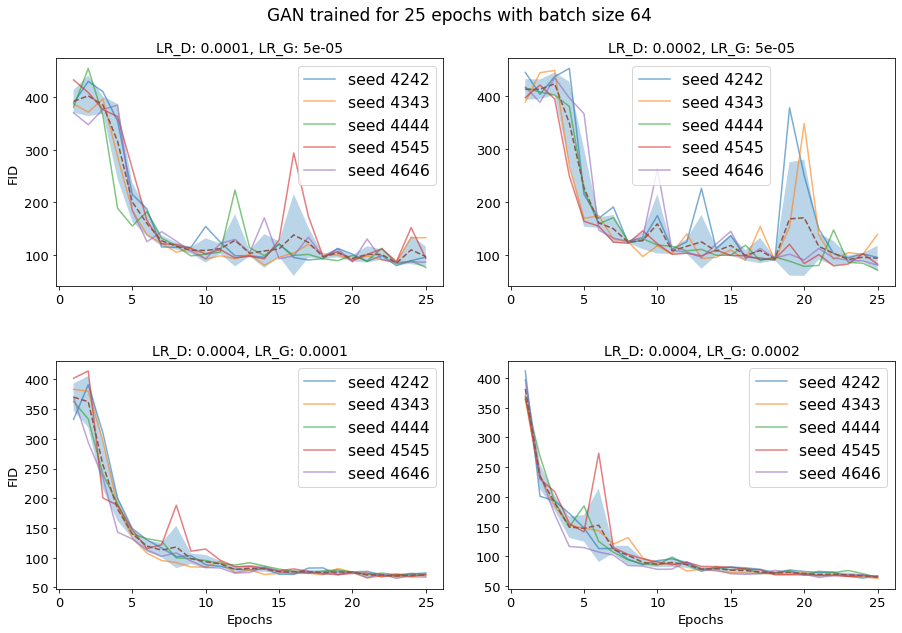

In [40]:
# create plot for 2nd group of hyperparams for GAN, bs=64
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

lr_list = [(0.0001, 5e-05), (0.0002, 5e-05), (0.0004, 0.0001), (0.0004, 0.0002)]
b_sizes = [64]

fig, ax = plt.subplots(figsize=(13,9), nrows=2, ncols=2)
ax = ax.flatten()
dat_gan = create_dict(find_logs('gan_hyper')[1], 128)


for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        data, means, stds = separate(dat_gan, lr[0], lr[1], b_size)
        p = create_line_plot(data, means, stds, ax=ax[e])
        eps = [i for i in range(1, len(data[0]['FIDs'])+1)]


fig.suptitle(f"{dat_gan[0]['gan_type']} trained for {len(eps)} epochs with batch size {b_sizes[0]}", fontsize = 17)
fig.tight_layout(pad=2.5)
fig.subplots_adjust(top=0.90)
plt.setp(ax[[2,3]], xlabel='Epochs')
plt.setp(ax[[0,2]], ylabel='FID')

plt.savefig(f'plots/gan_plots_hyperset2/gan_hyperset_2_64.jpg', bbox_inches='tight')
    

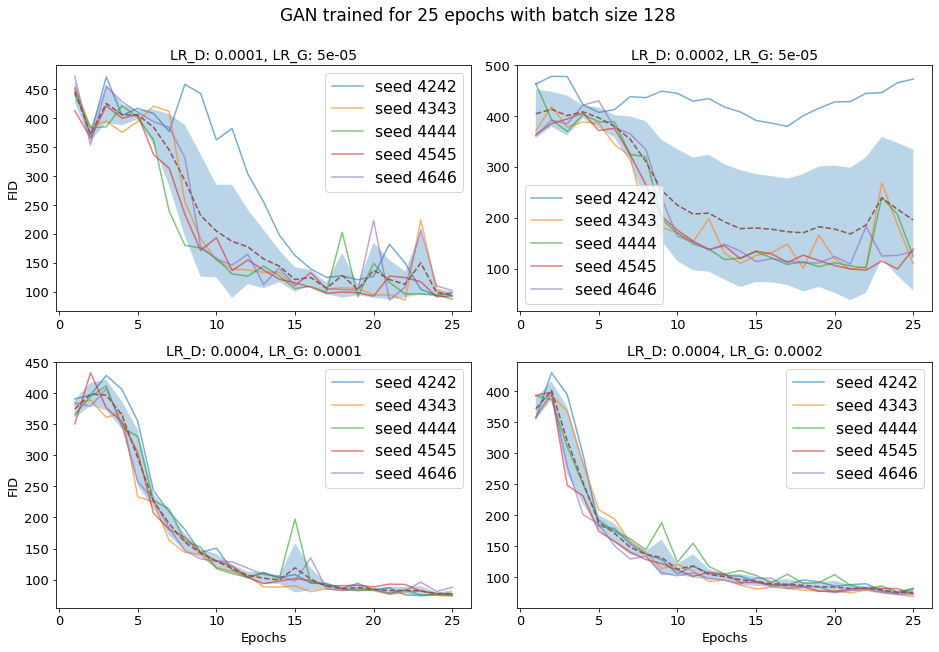

In [41]:
# create plot for 2nd group of hyperparams for GAN, bs=128
lr_list = [(0.0001, 5e-05), (0.0002, 5e-05), (0.0004, 0.0001), (0.0004, 0.0002)]
b_sizes = [128]

fig, ax = plt.subplots(figsize=(13,9), nrows=2, ncols=2)
ax = ax.flatten()
dat_gan = create_dict(find_logs('gan_hyper')[1], 128)


for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        data, means, stds = separate(dat_gan, lr[0], lr[1], b_size)
        p = create_line_plot(data, means, stds, ax=ax[e])
        eps = [i for i in range(1, len(data[0]['FIDs'])+1)]


fig.suptitle(f"{dat_gan[0]['gan_type']} trained for {len(eps)} epochs with batch size {b_sizes[0]}", fontsize = 17)
fig.tight_layout()
fig.subplots_adjust(top=0.89)
plt.setp(ax[[2,3]], xlabel='Epochs')
plt.setp(ax[[0,2]], ylabel='FID')

plt.savefig(f'plots/gan_plots_hyperset2/gan_hyperset_2_128.jpg', bbox_inches='tight')

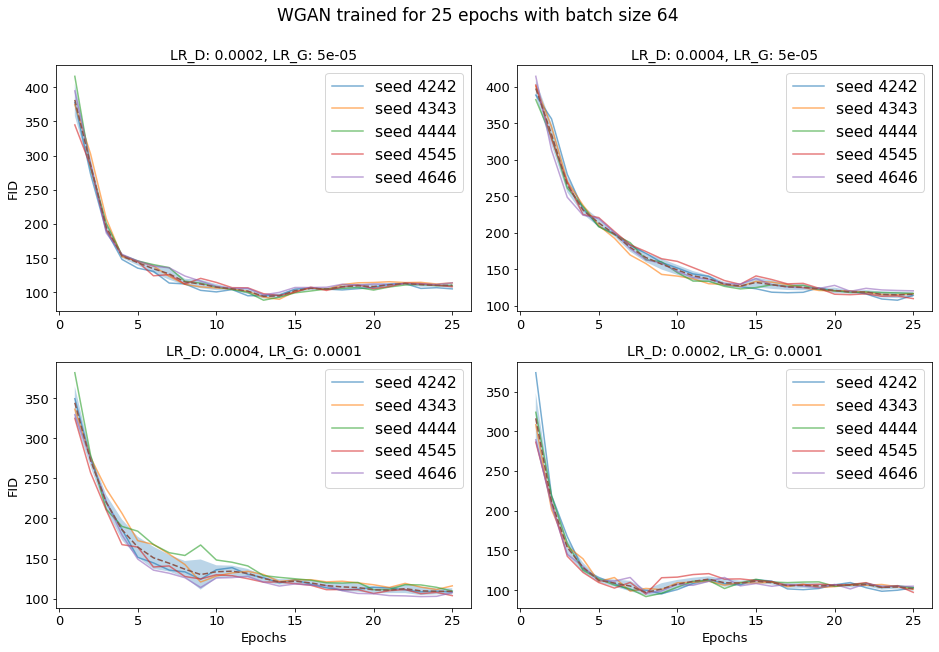

In [42]:
# create plot for 2nd group of hyperparams for WGAN, bs=64
lr_list = [(0.0002, 5e-05), (0.0004, 5e-05), (0.0004, 0.0001), (0.0002, 0.0001)]
b_sizes = [64]
fig, ax = plt.subplots(figsize=(13,9), nrows=2, ncols=2)
ax = ax.flatten()
dat_gan = create_dict(find_logs('wgan_hyper')[0], 128)


for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        data, means, stds = separate(dat_gan, lr[0], lr[1], b_size)
        create_line_plot(data, means, stds, ax=ax[e])
        eps = [i for i in range(1, len(data[0]['FIDs'])+1)]


fig.suptitle(f"{dat_gan[0]['gan_type']} trained for {len(eps)} epochs with batch size {b_sizes[0]}", fontsize = 17)
fig.tight_layout()
fig.subplots_adjust(top=0.89)
plt.setp(ax[[2,3]], xlabel='Epochs')
plt.setp(ax[[0,2]], ylabel='FID')


plt.savefig(f'plots/wgan_plots_hyperset2/wgan_hyperset_2_64.jpg', bbox_inches='tight')

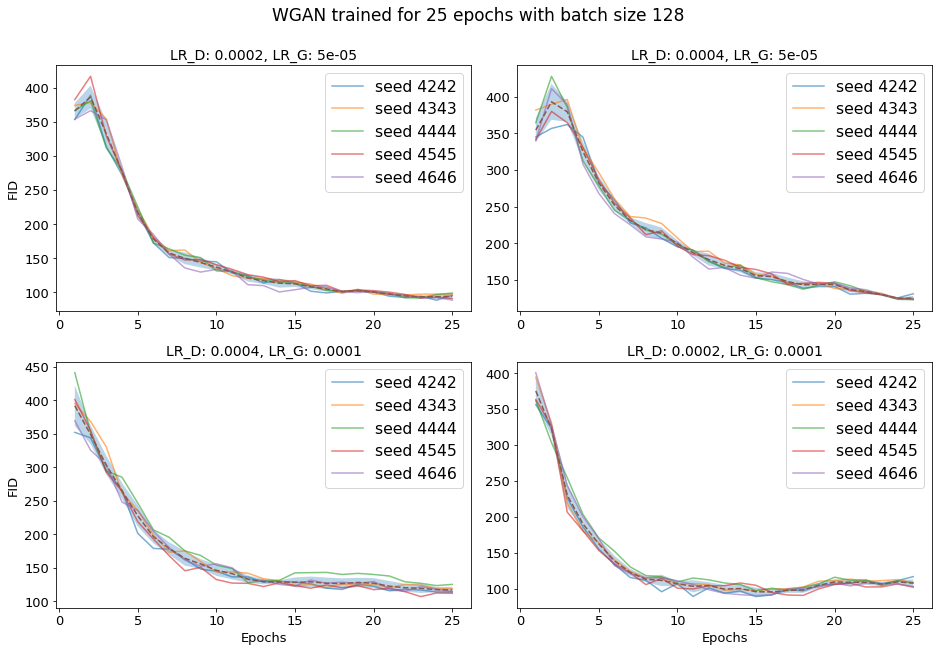

In [43]:
# create plot for 2nd group of hyperparams for WGAN, bs=128
lr_list = [(0.0002, 5e-05), (0.0004, 5e-05), (0.0004, 0.0001), (0.0002, 0.0001)]
b_sizes = [128]
fig, ax = plt.subplots(figsize=(13,9), nrows=2, ncols=2)
ax = ax.flatten()
dat_gan = create_dict(find_logs('wgan_hyper')[0], 128)


for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        data, means, stds = separate(dat_gan, lr[0], lr[1], b_size)
        create_line_plot(data, means, stds, ax=ax[e])
        eps = [i for i in range(1, len(data[0]['FIDs'])+1)]


fig.suptitle(f"{dat_gan[0]['gan_type']} trained for {len(eps)} epochs with batch size {b_sizes[0]}", fontsize = 17)
fig.tight_layout()
fig.subplots_adjust(top=0.89)
plt.setp(ax[[2,3]], xlabel='Epochs')
plt.setp(ax[[0,2]], ylabel='FID')


plt.savefig(f'plots/wgan_plots_hyperset2/wgan_hyperset_2_128.jpg', bbox_inches='tight')

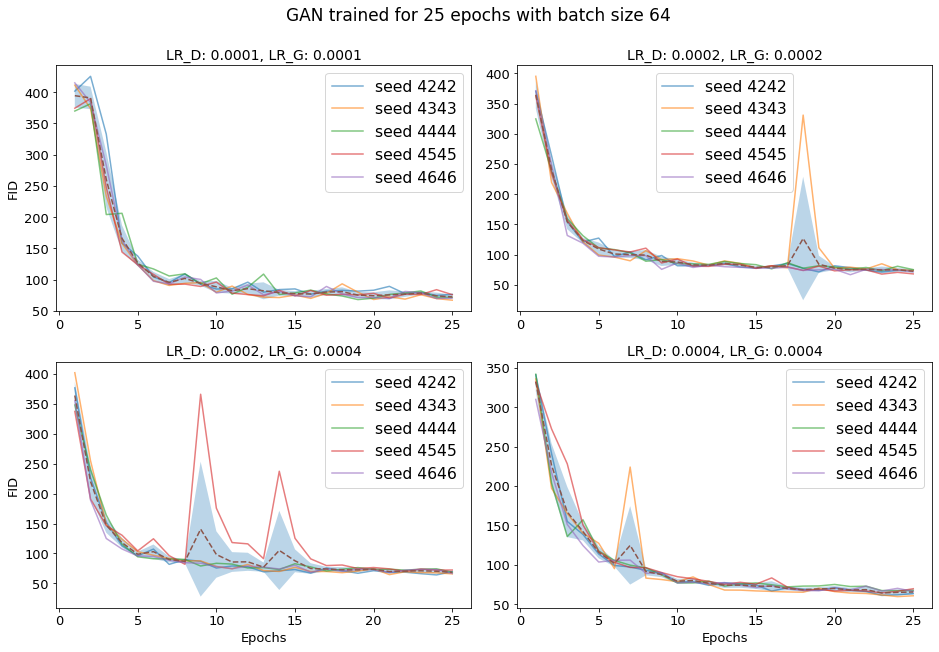

In [44]:
# create plot for 1st group of hyperparams for GAN, bs=64
lr_list = [(0.0001, 0.0001), (0.0002, 0.0002), (0.0002, 0.0004), (0.0004, 0.0004)]
b_sizes = [64]
fig, ax = plt.subplots(figsize=(13,9), nrows=2, ncols=2)
ax = ax.flatten()
dat_gan = create_dict(find_logs('hyper_saves')[1], 128)


for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        data, means, stds = separate(dat_gan, lr[0], lr[1], b_size)
        create_line_plot(data, means, stds, ax=ax[e])
        eps = [i for i in range(1, len(data[0]['FIDs'])+1)]


fig.suptitle(f"{dat_gan[0]['gan_type']} trained for {len(eps)} epochs with batch size {b_sizes[0]}", fontsize = 17)
fig.tight_layout()
fig.subplots_adjust(top=0.89)
plt.setp(ax[[2,3]], xlabel='Epochs')
plt.setp(ax[[0,2]], ylabel='FID')


plt.savefig(f'plots/gan_plots_hyperset1/gan_hyperset_1_64.jpg', bbox_inches='tight')

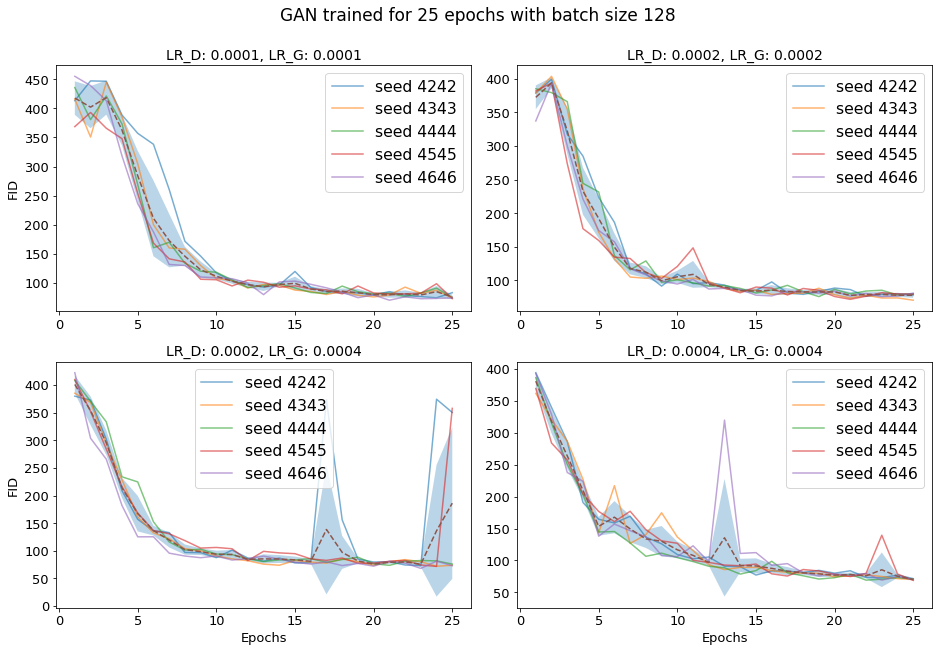

In [45]:
# create plot for 1st group of hyperparams for GAN, bs=128
lr_list = [(0.0001, 0.0001), (0.0002, 0.0002), (0.0002, 0.0004), (0.0004, 0.0004)]
b_sizes = [128]
fig, ax = plt.subplots(figsize=(13,9), nrows=2, ncols=2)
ax = ax.flatten()
dat_gan = create_dict(find_logs('hyper_saves')[1], 128)


for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        data, means, stds = separate(dat_gan, lr[0], lr[1], b_size)
        create_line_plot(data, means, stds, ax=ax[e])
        eps = [i for i in range(1, len(data[0]['FIDs'])+1)]


fig.suptitle(f"{dat_gan[0]['gan_type']} trained for {len(eps)} epochs with batch size {b_sizes[0]}", fontsize = 17)
fig.tight_layout()
fig.subplots_adjust(top=0.89)
plt.setp(ax[[2,3]], xlabel='Epochs')
plt.setp(ax[[0,2]], ylabel='FID')


plt.savefig(f'plots/gan_plots_hyperset1/gan_hyperset_1_128.jpg', bbox_inches='tight')

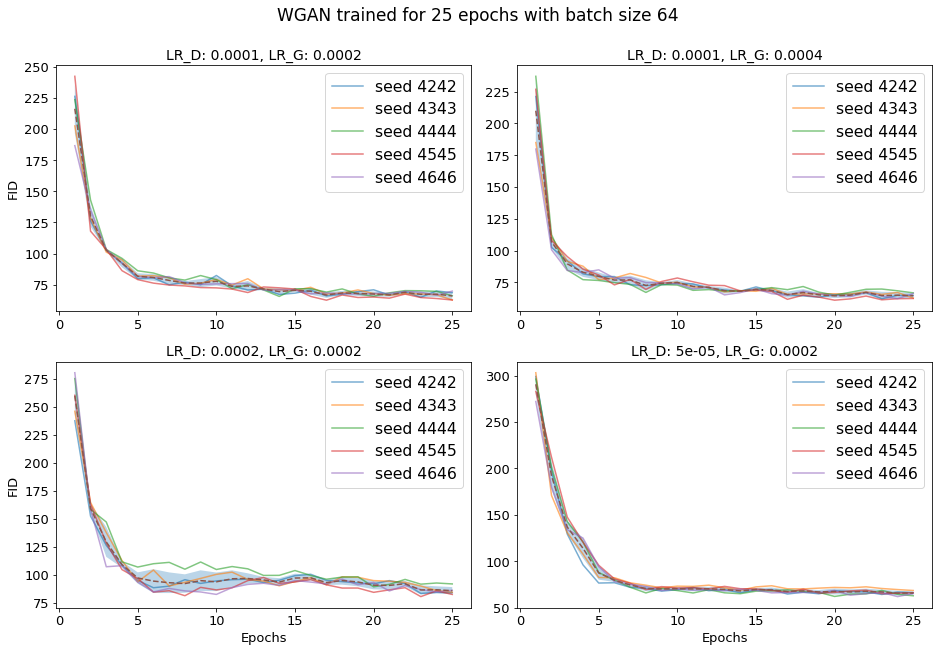

In [46]:
# create plot for 1st group of hyperparams for WGAN, bs=64
lr_list = [(0.0001, 0.0002), (0.0001, 0.0004), (0.0002, 0.0002), (5e-05, 0.0002)]
b_sizes = [64]
fig, ax = plt.subplots(figsize=(13,9), nrows=2, ncols=2)
ax = ax.flatten()
dat_gan = create_dict(find_logs('hyper_saves')[0], 128)

for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        data, means, stds = separate(dat_gan, lr[0], lr[1], b_size)
        create_line_plot(data, means, stds, ax=ax[e])
        eps = [i for i in range(1, len(data[0]['FIDs'])+1)]


fig.suptitle(f"{dat_gan[0]['gan_type']} trained for {len(eps)} epochs with batch size {b_sizes[0]}", fontsize = 17)
fig.tight_layout()
fig.subplots_adjust(top=0.89)
plt.setp(ax[[2,3]], xlabel='Epochs')
plt.setp(ax[[0,2]], ylabel='FID')


plt.savefig(f'plots/wgan_plots_hyperset1/wgan_hyperset_1_64.jpg', bbox_inches='tight')

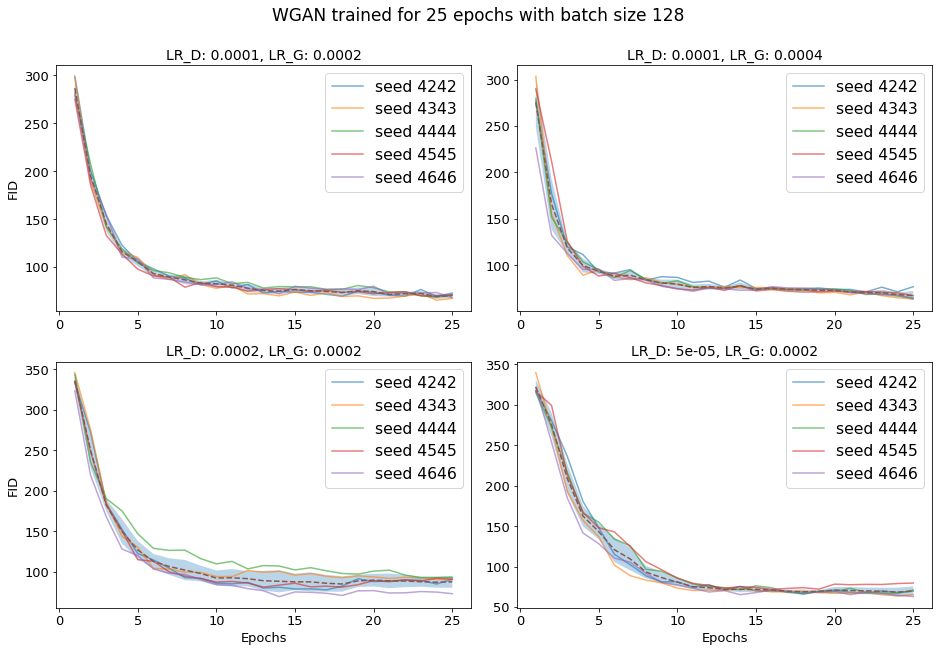

In [47]:
# create plot for 1st group of hyperparams for WGAN, bs=128
lr_list = [(0.0001, 0.0002), (0.0001, 0.0004), (0.0002, 0.0002), (5e-05, 0.0002)]
b_sizes = [128]
fig, ax = plt.subplots(figsize=(13,9), nrows=2, ncols=2)
ax = ax.flatten()
dat_gan = create_dict(find_logs('hyper_saves')[0], 128)

for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        data, means, stds = separate(dat_gan, lr[0], lr[1], b_size)
        create_line_plot(data, means, stds, ax=ax[e])
        eps = [i for i in range(1, len(data[0]['FIDs'])+1)]


fig.suptitle(f"{dat_gan[0]['gan_type']} trained for {len(eps)} epochs with batch size {b_sizes[0]}", fontsize = 17)
fig.tight_layout()
fig.subplots_adjust(top=0.89)
plt.setp(ax[[2,3]], xlabel='Epochs')
plt.setp(ax[[0,2]], ylabel='FID')


plt.savefig(f'plots/wgan_plots_hyperset1/wgan_hyperset_1_128.jpg', bbox_inches='tight')

In [8]:
import pandas as pd

lr_list = [(0.0001, 0.0001), (0.0002, 0.0002), (0.0002, 0.0004), (0.0004, 0.0004)]
b_sizes = [64, 128]


res = pd.DataFrame()
data = create_dict(find_logs('hyper_saves')[1], 128)

for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        dat, means, stds = separate(data, lr[0], lr[1], b_size)
        last_fid, lr_d, lr_g, bsize, gan_type = means[-1], dat[0]['LR_D'], dat[0]['LR_G'], dat[0]['BATCH_SIZE'], dat[0]['gan_type']
        res = res.append({'LR_D and LR_G' : (lr_d, lr_g), 'Mean FID from last epoch across all runs' : f'{round(last_fid, 2)} \u00B1 {round(stds[-1], 2)}', 'Batch Size' : str(bsize), 'GAN Type': gan_type}, ignore_index=True)

res

,Batch Size,GAN Type,LR_D and LR_G,Mean FID from last epoch across all runs
0,64,GAN,"(0.0001, 0.0001)",72.32 ± 3.48
1,64,GAN,"(0.0002, 0.0002)",72.49 ± 2.49
2,64,GAN,"(0.0002, 0.0004)",68.6 ± 2.29
3,64,GAN,"(0.0004, 0.0004)",65.56 ± 3.13
4,128,GAN,"(0.0001, 0.0001)",75.47 ± 3.74
5,128,GAN,"(0.0002, 0.0002)",78.04 ± 3.77
6,128,GAN,"(0.0002, 0.0004)",186.14 ± 137.13
7,128,GAN,"(0.0004, 0.0004)",70.21 ± 0.93


In [9]:
lr_list = [(0.0001, 0.0002), (0.0001, 0.0004), (0.0002, 0.0002), (5e-05, 0.0002)]
b_sizes = [64, 128]


res = pd.DataFrame()
data = create_dict(find_logs('hyper_saves')[0], 128)

for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        dat, means, stds = separate(data, lr[0], lr[1], b_size)
        last_fid, lr_d, lr_g, bsize, gan_type = means[-1], dat[0]['LR_D'], dat[0]['LR_G'], dat[0]['BATCH_SIZE'], dat[0]['gan_type']
        res = res.append({'LR_D and LR_G' : (lr_d, lr_g), 'Mean FID from last epoch across all runs' : f'{round(last_fid, 2)} \u00B1 {round(stds[-1], 2)}', 'Batch Size' : str(bsize), 'GAN Type': gan_type}, ignore_index=True)

res

,Batch Size,GAN Type,LR_D and LR_G,Mean FID from last epoch across all runs
0,64,WGAN,"(0.0001, 0.0002)",66.04 ± 2.94
1,64,WGAN,"(0.0001, 0.0004)",64.58 ± 1.79
2,64,WGAN,"(0.0002, 0.0002)",85.68 ± 3.25
3,64,WGAN,"(5e-05, 0.0002)",65.84 ± 1.83
4,128,WGAN,"(0.0001, 0.0002)",70.05 ± 2.07
5,128,WGAN,"(0.0001, 0.0004)",67.16 ± 4.95
6,128,WGAN,"(0.0002, 0.0002)",87.78 ± 7.41
7,128,WGAN,"(5e-05, 0.0002)",69.65 ± 5.77


In [10]:
lr_list = [(0.0002, 5e-05), (0.0004, 5e-05), (0.0004, 0.0001), (0.0002, 0.0001)]
b_sizes = [64, 128]

# [(0.0001, 5e-05), (0.0002, 5e-05), (0.0004, 0.0001), (0.0004, 0.0002)]
res = pd.DataFrame()
data = create_dict(find_logs('wgan_hyper')[0], 128)

for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        dat, means, stds = separate(data, lr[0], lr[1], b_size)
        last_fid, lr_d, lr_g, bsize, gan_type = means[-1], dat[0]['LR_D'], dat[0]['LR_G'], dat[0]['BATCH_SIZE'], dat[0]['gan_type']
        res = res.append({'LR_D and LR_G' : (lr_d, lr_g), 'Mean FID from last epoch across all runs' : f'{round(last_fid, 2)} \u00B1 {round(stds[-1], 2)}', 'Batch Size' : str(bsize), 'GAN Type': gan_type}, ignore_index=True)

res

,Batch Size,GAN Type,LR_D and LR_G,Mean FID from last epoch across all runs
0,64,WGAN,"(0.0002, 5e-05)",110.35 ± 3.4
1,64,WGAN,"(0.0004, 5e-05)",115.73 ± 3.52
2,64,WGAN,"(0.0004, 0.0001)",109.01 ± 3.98
3,64,WGAN,"(0.0002, 0.0001)",101.81 ± 2.6
4,128,WGAN,"(0.0002, 5e-05)",94.23 ± 3.95
5,128,WGAN,"(0.0004, 5e-05)",125.23 ± 3.0
6,128,WGAN,"(0.0004, 0.0001)",117.08 ± 4.72
7,128,WGAN,"(0.0002, 0.0001)",107.94 ± 5.21


In [11]:
lr_list = [(0.0001, 5e-05), (0.0002, 5e-05), (0.0004, 0.0001), (0.0004, 0.0002)]
b_sizes = [64, 128]

res = pd.DataFrame()
data = create_dict(find_logs('gan_hyper')[1], 128)

for b_size in b_sizes:
    for e,lr in enumerate(lr_list):
        dat, means, stds = separate(data, lr[0], lr[1], b_size)
        last_fid, lr_d, lr_g, bsize, gan_type = means[-1], dat[0]['LR_D'], dat[0]['LR_G'], dat[0]['BATCH_SIZE'], dat[0]['gan_type']
        res = res.append({'LR_D and LR_G' : (lr_d, lr_g), 'Mean FID from last epoch across all runs' : f'{round(last_fid, 2)} \u00B1 {round(stds[-1], 2)}', 'Batch Size' : str(bsize), 'GAN Type': gan_type}, ignore_index=True)

res

,Batch Size,GAN Type,LR_D and LR_G,Mean FID from last epoch across all runs
0,64,GAN,"(0.0001, 5e-05)",96.61 ± 19.17
1,64,GAN,"(0.0002, 5e-05)",94.78 ± 23.75
2,64,GAN,"(0.0004, 0.0001)",70.55 ± 2.5
3,64,GAN,"(0.0004, 0.0002)",65.11 ± 1.5
4,128,GAN,"(0.0001, 5e-05)",95.02 ± 5.17
5,128,GAN,"(0.0002, 5e-05)",195.87 ± 138.93
6,128,GAN,"(0.0004, 0.0001)",77.72 ± 5.08
7,128,GAN,"(0.0004, 0.0002)",75.93 ± 5.15
